In [182]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import csv

In [183]:
df = pd.read_csv('the_art_of_war.csv', delimiter = '\t')
df

,",tweets;;;;;"
0,"0,""If you know the enemy &amp; know yourself, ..."
1,;;;;;
2,"-The Art of War"";;;;;"
3,"1,""Today's Italian American MLB player is Art ..."
4,"2,""@Cernovich @rramom59 You are such a drama q..."
...,...
2617,"997,""Know yourself and you will win all battle..."
2618,;;;;;
2619,"—Sun Tzu, The Art of War"";;;;;"
2620,"998,@Peterman43 The art of war;;;;;"


In [215]:
df.columns = ['tweets']
df

,tweets
0,"0,""If you know the enemy &amp; know yourself, ..."
1,;;;;;
2,"-The Art of War"";;;;;"
3,"1,""Today's Italian American MLB player is Art ..."
4,"2,""@Cernovich @rramom59 You are such a drama q..."
...,...
2617,"997,""Know yourself and you will win all battle..."
2618,;;;;;
2619,"—Sun Tzu, The Art of War"";;;;;"
2620,"998,@Peterman43 The art of war;;;;;"


In [216]:
text = " ".join(i for i in df['tweets'])
text = text.replace("https", "")

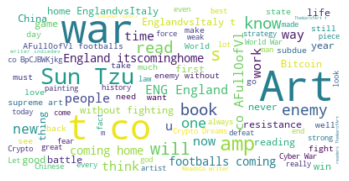

In [217]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()